<a href="https://colab.research.google.com/github/abhaynathk/Detectron2_Model_training_and_evaluation/blob/main/Copy_of_Detectron_2_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.__version__
import torchvision
torchvision.__version__

'0.15.2+cu118'

In [1]:
!pip install git+https://github.com/facebookresearch/fvcore.git

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-ovze9n68
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-ovze9n68
  Resolved https://github.com/facebookresearch/fvcore.git to commit 9d683aae73fb899dd35d6cf6720e5ef567761c57
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65324 sha256=a8c9bd0e7cada601bdde161ab0cbc9f8a1d983a1eff0a48ceac2ace79f854136
  Stored in directory: /tmp/pip-ephem-wheel-cache-6azl59x9/wheels/8f/cb/6a/3b7ac0e01781855ca3d1417ebf9e15e20d5b7fe37ab063aa50
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31530 sha256=617ee20bd411ad07c0bdcd38dac63fa535a44c54143698ed1149374f8ebde7bd
  Stored in directory: /root/.cache/pip/wheels/9a/a3/b6/ac0fcd1b4ed5cfeb3db92e6a0e47

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15263, done.
remote: Counting objects: 100% (284/284), done.
remote: Compressing objects: 100% (203/203), done.
remote: Total 15263 (delta 150), reused 144 (delta 81), pack-reused 14979
Receiving objects: 100% (15263/15263), 6.29 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (11012/11012), done.


In [3]:
!pip install -e detectron2_repo

Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=d684a04356dfa8d63f4bf4b5c29bd734d36503c49e2e11cecd10d946bdc6457c
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=5d55fa7777fc68afc2f2bda2ea99d4215dacb8954348e4

In [ ]:
!pip install detectron2

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
!nvidia-smi

Thu Oct 12 10:50:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import detectron2

In [ ]:
from detectron2.utils.logger import setup_logger
setup_logger()
%matplotlib inline
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [ ]:
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt

In [ ]:
import torch

In [ ]:
torch.cuda.empty_cache()

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.structures import BoxMode
import json
import os

def load_coco_json(dataset_dir, json_file, dataset_name):
    # Load the COCO json file
    json_file = os.path.join(dataset_dir, json_file)
    with open(json_file) as f:
        data = json.load(f)

    # Create a list to store the dataset dicts
    dataset_dicts = []
    for img_id, img in enumerate(data["images"]):
        record = {}

        # Add basic image info
        record["file_name"] = os.path.join(dataset_dir, img["file_name"])
        record["height"] = img["height"]
        record["width"] = img["width"]
        record["image_id"] = img_id

        # Add annotations if they exist in the data
        if "annotations" in data:
            objs = []
            for ann in data["annotations"]:
                if ann["image_id"] == img["id"]:
                    obj = {
                        "bbox": ann["bbox"],
                        "bbox_mode": BoxMode.XYWH_ABS,
                        "category_id": ann["category_id"],
                    }
                    objs.append(obj)
            record["annotations"] = objs

        dataset_dicts.append(record)

    # Register the dataset in Detectron2's DatasetCatalog and add metadata
    DatasetCatalog.register(dataset_name, lambda: dataset_dicts)
    MetadataCatalog.get(dataset_name).set(thing_classes=[c["name"] for c in data["categories"]])

    return dataset_dicts


In [ ]:
dataset_dicts = load_coco_json("/content/pipe-inventory-4/train", "_annotations.coco.json", "my_dataset55")


In [ ]:
from detectron2.config import get_cfg
cfg = get_cfg()
# Create a Detectron2 configuration file.
cfg.merge_from_file(f"/content/detectron2_repo/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
from detectron2.model_zoo import get_checkpoint_url

cfg.MODEL.WEIGHTS = get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")


# Update the config file with your dataset information.
cfg.DATASETS.TRAIN = ("my_dataset55",)
cfg.DATASETS.TEST = ()
cfg.SOLVER.IMS_PER_BATCH =2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300

# Train the Detectron2 model.
from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/12 10:51:46 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_f6e8b1.pkl: 243MB [00:01, 177MB/s]                           


[10/12 10:51:48 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[10/12 10:52:13 d2.utils.events]:  eta: 0:04:18  iter: 19  total_loss: 10.21  loss_cls: 3.842  loss_box_reg: 0.179  loss_rpn_cls: 5.727  loss_rpn_loc: 0.4852    time: 0.9535  last_time: 0.8608  data_time: 0.0533  last_data_time: 0.0053   lr: 1.6068e-05  max_mem: 12669M
[10/12 10:52:35 d2.utils.events]:  eta: 0:03:57  iter: 39  total_loss: 2.825  loss_cls: 1.896  loss_box_reg: 0.3428  loss_rpn_cls: 0.3097  loss_rpn_loc: 0.3361    time: 0.9562  last_time: 0.8290  data_time: 0.0112  last_data_time: 0.0060   lr: 3.2718e-05  max_mem: 12749M
[10/12 10:52:53 d2.utils.events]:  eta: 0:03:37  iter: 59  total_loss: 2.103  loss_cls: 1.301  loss_box_reg: 0.3482  loss_rpn_cls: 0.1312  loss_rpn_loc: 0.261    time: 0.9379  last_time: 0.8670  data_time: 0.0113  last_data_time: 0.0053   lr: 4.9367e-05  max_mem: 12749M
[10/12 10:53:11 d2.utils.events]:  eta: 0:03:19  iter: 79  total_loss: 1.745  loss_cls: 0.9793  loss_box_reg: 0.3903  loss_rpn_cls: 0.1038  loss_rpn_loc: 0.2196    time: 0.9304  last_time

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

<IPython.core.display.Javascript object>

In [ ]:
#Inference & evaluation using the trained model
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

[10/12 11:03:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts = load_coco_json("/content/pipe-inventory-4/valid",'_annotations.coco.json', "valid_dataset2")


In [ ]:
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get("valid_dataset2")

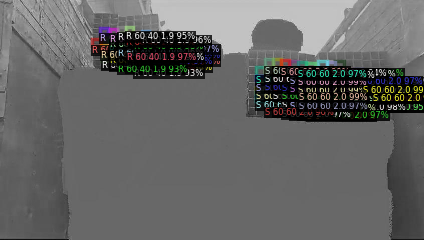

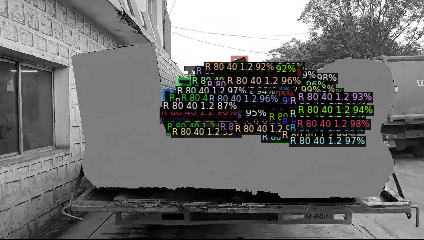

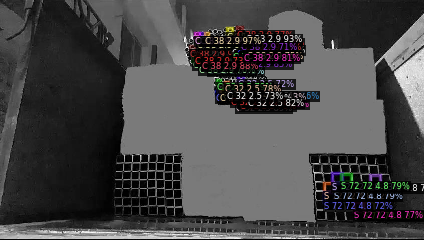

In [ ]:
from google.colab.patches import cv2_imshow
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=metadata,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

We can also evaluate its performance using AP metric implemented in COCO API. This gives an AP of ~70. Not bad!

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("valid_dataset2", output_dir="./output")
val_loader = build_detection_test_loader(cfg, "valid_dataset2")
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

[10/12 11:40:10 d2.evaluation.coco_evaluation]: Trying to convert 'valid_dataset2' to COCO format ...
[10/12 11:40:10 d2.data.datasets.coco]: Converting annotations of dataset 'valid_dataset2' to COCO format ...)
[10/12 11:40:10 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[10/12 11:40:14 d2.data.datasets.coco]: Conversion finished, #images: 42, #annotations: 21558
[10/12 11:40:14 d2.data.datasets.coco]: Caching COCO format annotations at './output/valid_dataset2_coco_format.json' ...
[10/12 11:40:15 d2.data.build]: Distribution of instances among all 25 categories:
|  category   | #instances   |  category   | #instances   |  category   | #instances   |
|:-----------:|:-------------|:-----------:|:-------------|:-----------:|:-------------|
|    pipes    | 0            |  C 32 2.5   | 1644         |  C 38 2.9   | 1868         |
|  C 48 2.9   | 0            | R 20 40 1.9 | 582          | R 25 75 1.9 | 1389         |
| R 48 96 2.0 | 108          | R 48 96 2.9 | 104  

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/12 11:40:17 d2.evaluation.evaluator]: Inference done 11/42. Dataloading: 0.0024 s/iter. Inference: 0.1451 s/iter. Eval: 0.0004 s/iter. Total: 0.1479 s/iter. ETA=0:00:04
[10/12 11:40:21 d2.evaluation.evaluator]: Total inference time: 0:00:05.589705 (0.151073 s / iter per device, on 1 devices)
[10/12 11:40:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:05 (0.146386 s / iter per device, on 1 devices)
[10/12 11:40:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/12 11:40:21 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/12 11:40:22 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
[10/12 11:40:22 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[10/12 11:40:22 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.14 seconds.
[10/12 11:40:22 d2.evaluation.